<a href="https://colab.research.google.com/github/BIRDRED/datascience/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas
import numpy as np
import sklearn.linear_model as lm
from sklearn import preprocessing, model_selection, metrics
import matplotlib.pyplot as plt
from sklearn import tree
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn import metrics
import seaborn as sns



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from IPython.display import display


#Pré-Processamento

In [ ]:
df_payment = pandas.read_csv('/content/drive/MyDrive/Pós-Graduação/Aprendizados de Dados em Tempo Real/Dados/Online_Payment_log.csv', sep=",")

In [ ]:
df_payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
la=LabelEncoder()
df_payment['type']=la.fit_transform(df_payment['type'])

In [ ]:
df_payment.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [ ]:
df_payment['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
target_col = 'isFraud'

# Regressão Linear

## Modelo

In [ ]:
model_map = {
    'linear': lm.LinearRegression(),
    'ridge': lm.Ridge(),
    'lasso': lm.Lasso()
}

In [ ]:
Y = df_payment['isFraud']
X = df_payment.drop('isFraud', axis=1)

In [ ]:
ytrain.value_counts()

0    5083533
1       6563
Name: isFraud, dtype: int64

In [ ]:
ytest.value_counts()

0    1270874
1       1650
Name: isFraud, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)

In [ ]:
df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train['isFraud'] = ytrain
df_test['isFraud'] = ytest

In [ ]:
for modelname, model in model_map.items():
    model.fit(xtrain, ytrain)    
    yhat_train = model.predict(xtrain)
    yhat_test  = model.predict(xtest)
    # Output table
    df_train[modelname] = yhat_train
    df_test[modelname] = yhat_test
    model_map[modelname] = model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+03, tolerance: 6.523e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
df_fraudcc = pandas.concat((df_train, df_test), axis=0)

## Critérios de Avaliação

In [ ]:
plt.figure()
idx = df_fraudcc['train_set'] == 0
df_fraudcc[idx].plot.scatter(target_col, 'linear', label='linear', color='k', ax=plt.gca())
df_fraudcc[idx].plot.scatter(target_col, 'ridge', label='ridge', color='b', ax=plt.gca())
df_fraudcc[idx].plot.scatter(target_col, 'lasso', label='lasso', color='g', ax=plt.gca())
# plt.gca().plot(df_auto[target_col],df_auto[target_col], 'ro', label='referência')
plt.grid()
plt.ylabel('Estimativa')

print('linear\t', metrics.mean_absolute_error(df_fraudcc[idx][target_col], df_fraudcc[idx]['linear']))
print('ridge\t', metrics.mean_absolute_error(df_fraudcc[idx][target_col], df_fraudcc[idx]['ridge']))
print('lasso\t', metrics.mean_absolute_error(df_fraudcc[idx][target_col], df_fraudcc[idx]['lasso']))


In [ ]:
def plot_coefs(modelname):
    fig = plt.figure(figsize=(15,4))

    
    coefs = model_map[modelname].coef_
    coef_names = xtrain.columns

    idx = np.argsort(coefs)

    plt.bar(np.arange(coefs.shape[0]), coefs[idx])
    plt.xticks(np.arange(coefs.shape[0]), coef_names[idx], rotation='90')
    plt.title('Coeficientes do modelo '+ modelname)
    plt.grid()
    plt.xlim((-0.5, coefs.shape[0]-0.5))
    plt.show()

interact(plot_coefs, modelname = list(model_map.keys()))

In [ ]:
df_fraudcc['isFraud'].value_counts()

# Árvores de Decisão

In [ ]:
dictFraud = {0: 'Não foi Fraude',1 : 'Foi Fraude'}
df_payment['label_Fraud'] = df_payment['isFraud'].map(dictFraud)

In [ ]:
fraud_label_map = df_payment[['label_Fraud', 'isFraud']].drop_duplicates()


In [ ]:
fraud_label_map.label_Fraud

0    Não foi Fraude
2        Foi Fraude
Name: label_Fraud, dtype: object

In [ ]:
df_payment.drop(['label_Fraud'],axis=1,inplace=True)

In [ ]:
Y = df_payment[target_col]
X = df_payment.drop(target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[target_col] = ytrain
df_test[target_col] = ytest

In [ ]:
model_payment = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
model_payment.fit(xtrain, ytrain)      
df_train['decision'] = model_payment.predict(xtrain)
df_test['decision']  = model_payment.predict(xtest)
df_train['probability'] = model_payment.predict_proba(xtrain)[:,1]
df_test['probability']  = model_payment.predict_proba(xtest)[:,1]

df_payment = pandas.concat((df_train, df_test), axis=0)

[Text(0, 0.5, 'Não foi Fraude'), Text(0, 1.5, 'Foi Fraude')]

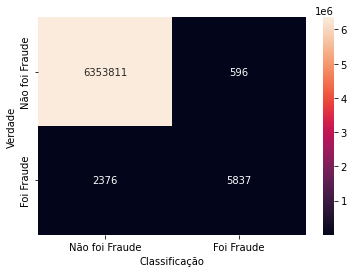

In [ ]:
cm = metrics.confusion_matrix(df_payment[target_col],
                              df_payment['decision'])

sns.heatmap(cm, annot=True, fmt = '.0f')

plt.xlabel('Classificação')
plt.ylabel('Verdade')
plt.gca().set_xticklabels(fraud_label_map.label_Fraud.values)
plt.gca().set_yticklabels(fraud_label_map.label_Fraud.values)

In [ ]:
print(metrics.classification_report(df_payment[target_col],
                              df_payment['decision'],
                              target_names = fraud_label_map.label_Fraud))

                precision    recall  f1-score   support

Não foi Fraude       1.00      1.00      1.00   6354407
    Foi Fraude       0.91      0.71      0.80      8213

      accuracy                           1.00   6362620
     macro avg       0.95      0.86      0.90   6362620
  weighted avg       1.00      1.00      1.00   6362620



In [ ]:
df_payment[df_payment['train_set'] == 1]['decision'].value_counts()/df_payment[df_payment['train_set'] == 1]['isFraud'].value_counts()

0    1.000273
1    0.788359
dtype: float64